In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
symbol = "ADAUSDT"

ADAData = pd.read_csv(f"./preparedData/{symbol}.csv", date_parser=True)
ADAData.head()

,open_time,open,high,low,close,volume,close_time
0,2018-05-01 05:30:00,0.34145,0.34199,0.31870,0.32173,32463784.08,2018-05-01 09:29:59
1,2018-05-01 09:30:00,0.32115,0.34300,0.32000,0.33787,14470581.61,2018-05-01 13:29:59
2,2018-05-01 13:30:00,0.33756,0.35900,0.33421,0.34093,25321414.19,2018-05-01 17:29:59
3,2018-05-01 17:30:00,0.34003,0.34290,0.33166,0.33735,16675168.68,2018-05-01 21:29:59
4,2018-05-01 21:30:00,0.33776,0.35950,0.33714,0.35374,18237446.69,2018-05-02 01:29:59


In [4]:
# close column of the data
close = ADAData['close']

# number of rows in data
data_shape = close.shape
rows = data_shape[0]

In [5]:
# plot of close price movement over the time period
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(range(0, rows)), y=close,
                         mode='lines',
                         name='lines', line=dict(width=1.5)))
fig.update_layout(template="plotly_dark", title="Original Close Data")
fig.show()

### Testing For Stationarity

In [6]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price_data):
    result=adfuller(price_data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [7]:
adfuller_test(close)

ADF Test Statistic : -0.21307077534165278
p-value : 0.9369455759513161
#Lags Used : 35
Number of Observations Used : 7734
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

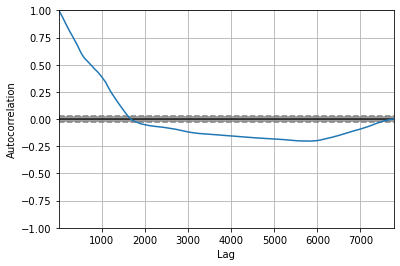

In [8]:
autocorrelation_plot(close)
plt.show()

ADF Test Statistic : -13.79444333081086
p-value : 8.802920476419336e-26
#Lags Used : 35
Number of Observations Used : 7724
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



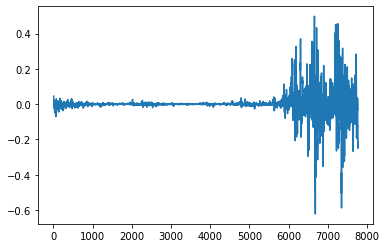

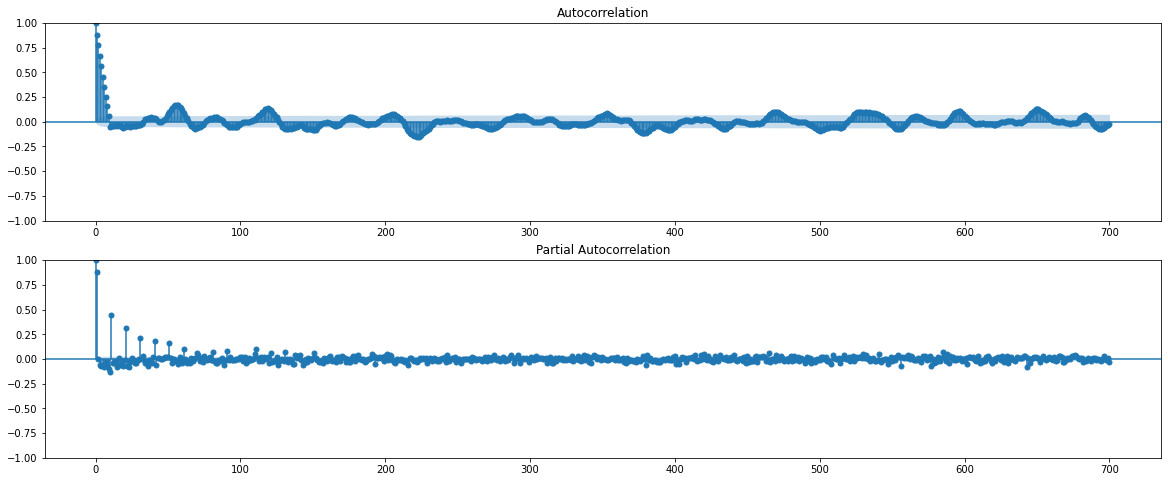

In [17]:
ADAData['Close First Difference'] = close - close.shift(10)
adfuller_test(ADAData['Close First Difference'].dropna())
ADAData['Close First Difference'].plot()

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(ADAData['Close First Difference'].iloc[13:],lags=700,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(ADAData['Close First Difference'].iloc[13:],lags=700,ax=ax2)

ADF Test Statistic : -8.320640308655452
p-value : 3.580457519464122e-13
#Lags Used : 32
Number of Observations Used : 7709
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/home/rg/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning:


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



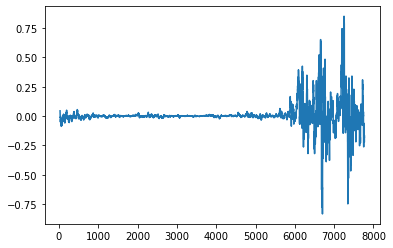

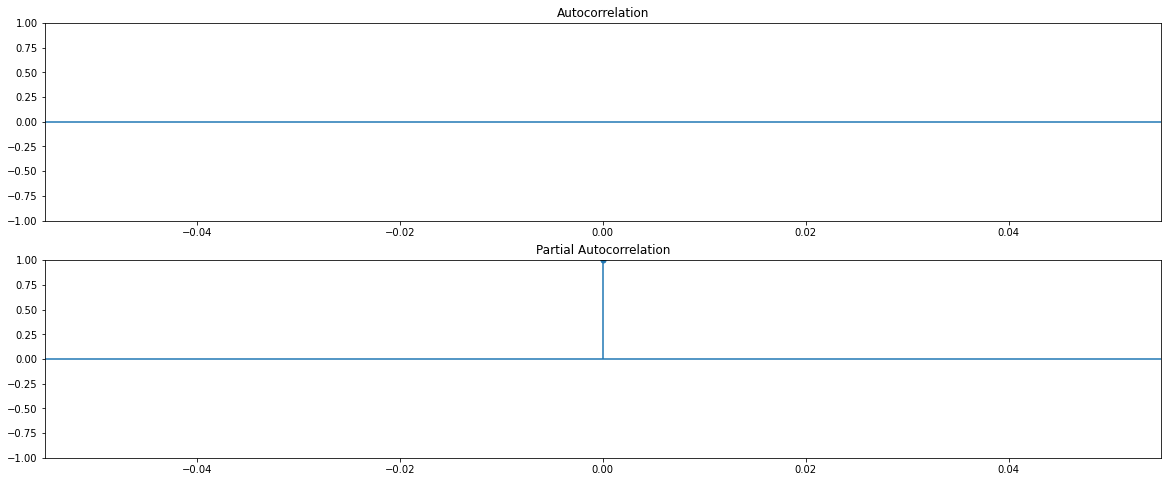

In [15]:
ADAData['Close First Difference'] = close - close.shift(28)
adfuller_test(ADAData['Close First Difference'].dropna())
ADAData['Close First Difference'].plot()

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(ADAData['Close First Difference'].iloc[13:],lags=700,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(ADAData['Close First Difference'].iloc[13:],lags=700,ax=ax2)

### Modelling

In [18]:
model=ARIMA(close,order=(1,1,10))
model_fit=model.fit()

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 7770
Model:                ARIMA(1, 1, 10)   Log Likelihood               18946.167
Date:                Fri, 26 Nov 2021   AIC                         -37868.334
Time:                        15:36:34   BIC                         -37784.839
Sample:                             0   HQIC                        -37839.713
                               - 7770                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0128      8.081     -0.002      0.999     -15.852      15.827
ma.L1         -0.0373      8.082     -0.005      0.996     -15.878      15.803
ma.L2          0.0031      0.405      0.008      0.994      -0.792       0.798
ma.L3          0.0091      0.031      0.296      0.767      -0.051       0.069
ma.L4         -0.0235      0.073     -0.323      0.747      -0.166       0.119
ma.L5         -0.0173      0.191     -0.090      0.928      -0.392       0.358
ma.L6         -0.0444      0.138     -0.323      0.747      -0.314       0.225
ma.L7         -0.0002      0.357     -0.001      1.000      -0.701       0.700
ma.L8          0.0122      0.005      2.243      0.025       0.002       0.023
ma.L9         -0.0302      0.099     -0.305      0.760      -0.224       0.164
ma.L10        -0.0009      0.245     -0.004      0.997      -0.481       0.480
sigma2         0.0004   1.78e-06    250.455      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            337468.85
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             181.09   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
ADAData['forecast']=model_fit.predict(start=rows-rows*0.2,end=rows,dynamic=True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(range(0, rows)), y=close,
                         mode='lines',
                         name='lines', line=dict(width=1)))
fig.add_trace(go.Scatter(x=np.array(range(0, rows)), y=ADAData['forecast'],
                         mode='lines',
                         name='lines', line=dict(width=1)))
fig.update_layout(template="plotly_dark", title="Original Close Data")
fig.show()

In [ ]:
model = SARIMAX(close, trend='n', order=(0,1,0), seasonal_order=(1,1,1,28))
model_fit=model.fit()
model_fit.summary()

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(range(rows-100, rows)), y=close[-100:],
                         mode='lines',
                         name='original price', line=dict(width=1)))
fig.add_trace(go.Scatter(x=np.array(range(rows, rows+28)), y=model_fit.predict(start = rows, end = rows+28, dynamic= True),
                         mode='lines',
                         name='pedicted price', line=dict(width=1)))
fig.update_layout(template="plotly_dark", title="Original Close Data")
fig.show()